# Продвинутый Python, Лекция 2

**Лектор:** Садуллаев Музаффар

**Семинаристы:** Бобоев Мурод, Богданов Сергей, Васина Олеся, Дергачев Cтепан, Какурин Василий, Садуллаев Музаффар, Солодовников Михаил

**In our heart**: Петров Тимур

**Spoiler Alert:** в рамках курса нельзя изучить ни одну из тем от и до досконально (к сожалению, на это требуется больше времени, чем даже 3 часа в неделю). Но мы попробуем рассказать столько, сколько возможно :)

Сегодня мы с вами поговорим про архитектуру кода так таковой, а после перейдем к Typing'у и Pydantic'у.

# Архитектура кода

Начнем с истории...

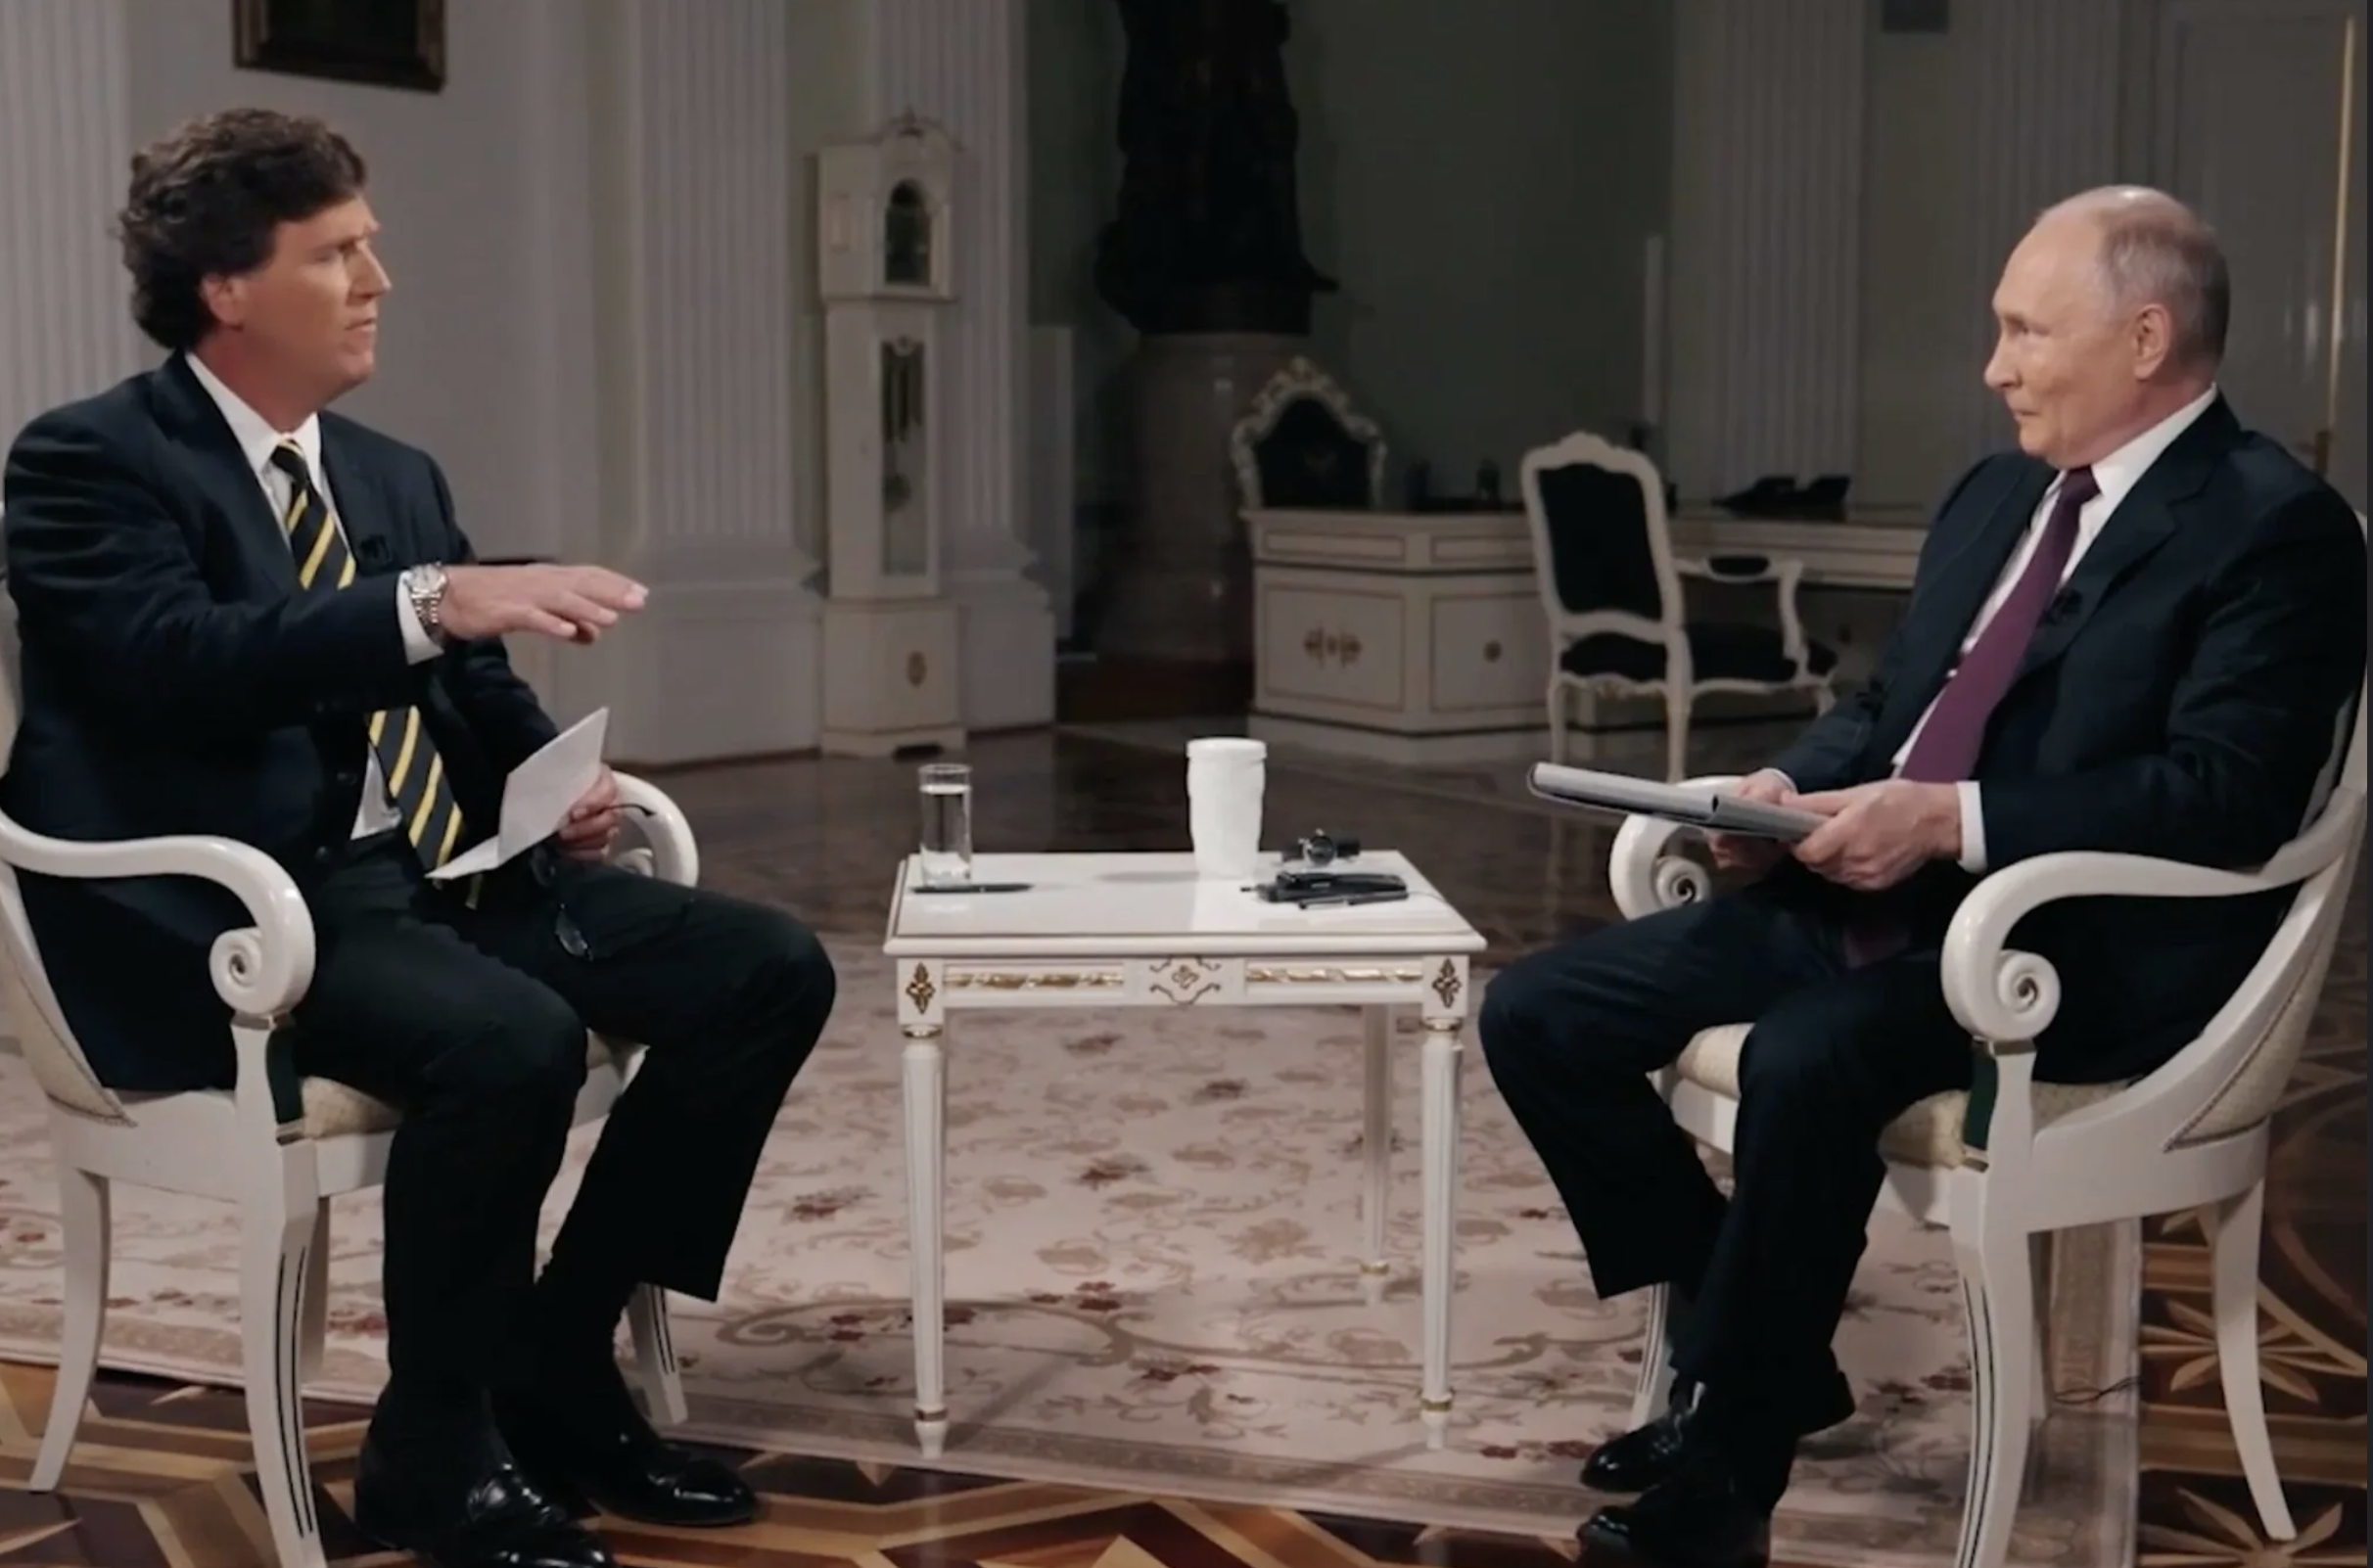

ООП — это исторически один из способов бороться со сложностью программного кода.

## Принципы ООП

### Давайте вспомним что там есть

ООП стоит на 4 китах:

* Абстракция - использование только тех параметров в классах, которые являются существенными (например, для моделирования попугая не нужно знать, что ест каждый попугай отдельно. Важно, что он умеет есть)

* Инкапсуляция - сокрытие методов и данных класса внутри него самого, которые не необходимы для взаимодействия с ним (например, для взаимодействия человека и попугая не нужно знать полное устройство попугая и внутренних процессов, как и попугаю не нужно устройство человека для взаимодействия)

* Наследование - возможность расширить или сузить класс и дополнить его (например, из класса попугаев мы создаем отдельно подкласс какаду, внутри которого есть большие какаду и есть отдельно еще маленькие кореллы)

* Полиморфизм - возможность реализовать один и тот же метод разными способами (например, для жизни одни попугаи ищут дупло, другие строят гнездо)

In [ ]:
class User:
    users_count = 0  # атрибут/поле класса 

    def __init__(self, name):          # конструктор
        self.name = name               # атрибут объекта
        User.users_count += 1

    def say_hello(self):               # обычный метод
        return f"Привет, я {self.name}!"

    @classmethod
    def all_users(cls):              # метод класса
        return f"Всего пользователей: {cls.users_count}"

    @staticmethod
    def help():                        # статический метод
        return "Я просто утилита, не бей меня!!!"

Обычный метод работает с конкретным объектом

```python
u = User("muza") # я есть объект
u.say_hello()

```

Метод класса, работает именно с самим классом: первый аргумент cls - класс
(НЕ ОБЪЕКТОМ!!!)

```python
# как видим я ниче не создал
print(User.all_users())

```

Статический метод `@staticmethod` работает сам по себе, вообще не лезет в состояние объекта ни прямо ни косвенно (просто может делать что то полезное как подарок)

```python
# как видим я ниче не создал
print(User.help())

```

`super().__init__(...)` - вызывает конструктор родительского класса. используется для того чтобы не дублировать код.


* переиспользует код родителя
* если изменить родителя, дочерний класс не нужно переписывать

In [14]:
class Person:
    def __init__(self, name):
        self.name = name

    def whoami(self):
        return f"Я человек по имени {self.name}"

In [16]:
class Student(Person):
    def __init__(self, name, university):
        super().__init__(name)
        self.university = university

    def whoami(self):
        base = super().whoami()
        return base + f", учусь в {self.university}"

In [17]:
s = Student("муза", "вшэ")
s.whoami()

'Я человек по имени муза, учусь в вшэ'

TLDR:

* Инкапсуляция — скрываем детали, оставляем только интерфейс
* Наследование — переиспользуем код и расширяем поведение
* Полиморфизм — работаем с объектами через общий контракт

### Откуда появилось ООП и что произошло после...

ООП появилось как ответ на рост сложности ПО в 80ых и 90ых годах.

Крупные компании вроде Microsoft, IBM и Sun Microsystems начали сталкиваться с тем, что поддерживать огромные системы на процедурных языках становилось всё труднее: кода было слишком много, он был сложен в разработке и сопровождении.

И в языках началось массовое внедренение поддержки работы ООП:
* В 1983 году Бьёрн Страуструп в Bell Labs добавил классы в язык C, так появился C++ — мощный и быстрый язык, который сохранил производительность C.

* В Sun Microsystems Джеймс Гослинг в середине 1990-х создал Java. Главная идея была в том, что каждая сущность в языке — объект. Java быстро стала стандартом для корпоративных приложений.

* В то же время появились первые версии Objective-C (1984), которые вдохновлялись идеями Smalltalk и дали новый толчок развитию объектной парадигмы.



ООП решало тогда 3 боли:
* Сложность (код можно структурировать в объекты)
* Повторное использование (наследование)
* Работа в командах (контракты между классами)

### Чего еще не хватало? и какие проблемы остались?

Потом выяснилось cледующее:
* глубокое наследование делает код хрупким (сейчас посмотрим пример)
* слои архитектуры приложений часто перемешиваются
* тестирование затруднено либо невозможно

### К чему пришли?

Пришли новые подходы:

* SOLID - правила о том, как правильно проектировать зависимости в системе
* Чистая архитектура - делим бизнес-логику и инфраструру на слои и зависимости
* DDD - Domain-Design-Driver - моделирование предметой области кодом

Теперь рассмотрим проблемы ООП

### Глубокое наследование - горе в семье

Глубокое наследование - рознь

In [18]:
class Animal:
    def sound(self):
        return "?"

class Monkey(Animal):
    def sound(self):
        return "ga-ga-ga"

class Human(Monkey):
    def sound(self):
        return "hello"

class RobotHuman(Human):
    pass

print(RobotHuman().sound())

# Пришел другой разработчик и чуть-чуть поправил класс. Что и произойдет?

class Human(Monkey):
    pass

class RobotHuman(Human):
    pass

print(RobotHuman().sound())


hello
ga-ga-ga


### Проблема ромба в наследовании

Если класс наследует сразу несколько родителей, которые происходят от общего предка, возникает путаница: чей метод брать?

In [21]:
class A:
    def hello(self): return "A"

class B(A):
    def hello(self): return "B"

class C(A):
    def hello(self): return "C"

class D(C, B):
    pass

print(D().hello())
print(D.mro()) 

C
[<class '__main__.D'>, <class '__main__.C'>, <class '__main__.B'>, <class '__main__.A'>, <class 'object'>]


Python использует MRO (Method resolution order) который построен на C3-линеаризации. То на уровне языка проблема зависимостей объектов от базового разрешаются.

Посмотрим на пример.

In [19]:
class A:
    def hello(self): return "A"
    
class F:
    def hello(self): return "F"

class B(A, F):
    def hello(self): return "B"

class C(F, A):
    def hello(self): return "C"

как думаете что произойдет?

In [20]:
class D(B, C):
    pass

TypeError: Cannot create a consistent method resolution order (MRO) for bases A, F

В чем тут конфликт?
1. Python (и любой ООП-язык) ищет метод по имени.
2. когда происходит вызов метода `d = D().sound()`, интерпретатор идет по цепочке классов и ищет первое совпадение по имени
3. Python не умеет думать -- он просто берет первый найденный метод и его вызывает.


Какая может быть аналогия?
Представьте что вы лежите дома, отдыхаете. Вам пишет первый друг в тг и говорит: "поехали пить пиво", а другой говорит: "пошли в доту" 

Что вы будете делать? Вы будете исходить кто первый написал. Также и тут.

Снова к нашим баранам

Конкретно про алгоритм этот расмотрим на семинаре, а так графы зависимостей можно посмотреть через метод `mro()` у любого класса

In [22]:
class A: pass
class F: pass
class B(A, F): pass
class C(A, F): pass
class D(B, C): pass

print(B.mro())
print(C.mro())
print(D.mro())
print("====")
print(B.__mro__)
print(C.__mro__)
print(D.__mro__)

[<class '__main__.B'>, <class '__main__.A'>, <class '__main__.F'>, <class 'object'>]
[<class '__main__.C'>, <class '__main__.A'>, <class '__main__.F'>, <class 'object'>]
[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class '__main__.F'>, <class 'object'>]
====
(<class '__main__.B'>, <class '__main__.A'>, <class '__main__.F'>, <class 'object'>)
(<class '__main__.C'>, <class '__main__.A'>, <class '__main__.F'>, <class 'object'>)
(<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class '__main__.F'>, <class 'object'>)


# SOLID

### S - Single Responsibility Principle (Принцип единственной ответственности)

У каждого класса должна быть только одна причина для изменения.

**Проблема** Класс выполняет слишком много действий. Идет прямое нарушение принципов `SOLID`

In [2]:
class Employee:
    def __init__(self, name, salary):
        self.name = name
        self.salary = salary

    def save_to_file(self): ...

Как делать правильно:
1. Первый класс создает сотрудника и начисляет ему зарплату
2. Второй класс будет будет его записывать

In [1]:
class Employee:
    def __init__(self, name, salary):
        self.name = name
        self.salary = salary
        
class EmployeeFileSaver:
    def save(self, employee): ...

### Open/Closed Principle (Принцип открытости/закрытости)

Код должен быть открыт для расширения, но закрыт для изменения

In [ ]:
def discount(price, user_type):
    if user_type == "student":
        return price * 0.5
    if user_type == "vip":
        return price * 0.8
    return price

**Проблема** Если завтра появится тип `mega_vip` то нам нужно лезть в код функции и править его. Не дело

А как надо? Как и говорили, мы можем только расширять, но не менять исходный код

In [23]:
class Discount:
    def apply(self, price):
        return price

class StudentDiscount(Discount):
    def apply(self, price):
        return price * 0.5

class VipDiscount(Discount):
    def apply(self, price):
        return price * 0.8
    
def discount(price, strategy):
    return strategy.apply(price)

### L — Liskov Substitution Principle (Принцип подстановки Барбары Лисков)

Дочерний класс должен полностью заменять родительский, не ломая логику.

In [24]:
class Bird:
    def eat(self) -> str:
        print("Я клюю зерно!")

    def fly(self) -> str:
        print("Я лечу!")
        

class Penguin(Bird):
    def fly(self) -> str:
        raise Exception("Пингвины не летают!")


**Проблема** Нарушаем контракт. В базовом контракте мы описывали что строго возвращаем строку. А в дочерней реализации мы возращаем `raise`.

А что нужно? Перепроектировать базовый метод. Уберем метод `fly` с базового. Потому что, как оказалось умение летать не у всех птиц имеется.

In [6]:
class Bird:
    def eat(self):
        print("Я клюю зерно!")


class FlyingBird(Bird):
    def fly(self):
        print("Я лечу!")


class Penguin(Bird):
    def swim(self):
        print("Я плаваю!")


p = Penguin()
p.eat()

Я клюю зерно!


### I — Interface Segregation Principle (Принцип разделения интерфейсов)

**Проблема** Лучше много маленьких интерфейсов чем один большой. Рассмотрим пример

In [7]:
class Machine:
    def print(self): ...
    def scan(self): ...
    def fax(self): ...

А как надо?

In [8]:
class Printer: 
    def print(self): ...

class Scanner: 
    def scan(self): ...

### D — Dependency Inversion Principle (Принцип инверсии зависимостей)

**Проблема** Модули верхнего уровня не должны зависеть от деталей. Оба должны зависеть от абстракций и то что приходит к ним на вход.

In [9]:
class FileLogger:
    def log(self, msg): ...
    
class Service:
    def __init__(self):
        self.logger = FileLogger() # вот тут мы закрыли кислород для того, чтобы в будущем хоть как-то его заменить...


А как нужно?

In [10]:
class ILogger:
    def log(self, msg): ...

class FileLogger(ILogger):
    def log(self, msg): ...

class Service:
    def __init__(self, logger: ILogger):
        self.logger = logger


# DDD

Это подход к проектированию, где в центре предметная область (domain), а не база данных или фреймворк / язык.

### Основные понятия

* Domain - предметная область (например, интернет-магазин)
* Entity (сущность) — объект с идентичностью (Пользователь, Заказ).
* Value Object (значение) — объект без идентичности, описывает свойства (Деньги, Адрес, Номер телефона).
* Repository — интерфейс для получения и сохранения информации по сущностям
* Ubiquitous Language - бизнес и разработчики говорят на одном языке

In [13]:
# Сущность - entity
class Order:
    def __init__(self, order_id, items):
        self.id = order_id
        self.items = items

    def total_price(self): ...

# Value object    
class Money:
    def __init__(self, amount: int, currency: str):
        self.amount = amount
        self.currency = currency

# Repo
class OrderRepository:
    def save(self, order: Order): ...
    def get(self, order_id): ...


### tldr

* ООП учит, как правильно использовать его свойства
* SOLID про то, как проектировать классы и не запутаться в будущем
* DDD - как связать код и внешний мир и сделать разработку прозрачной

## Чистая архитектура

Рассмотрим следующий листинг кода

```python

def create_order(user_id: str, items: dict[str, int]):
    total = sum(item["price"] for item in items)

    conn = sqlite3.connect("vapeshop.db")
    cursor = conn.cursor()

    cursor.execute("INSERT INTO orders(user, total) VALUES (?, ?)", (user, total))
    conn.commit()

    print(f"Заказ для {user} создан на сумму {total} USD")

```

Что тут не так?

Первый вопрос который мы хотим задать -- а как тестировать эту функцию?
* Как нам в тестах использовать тестовый энваенрмент и не ходить в реальную базу?
* как нам сделать каждую логику самостоятельной ? и расширяемой?

* Бизнес-правило -- посчитать заказ перемешалось с сохранением в репозитории
* Завтра нам запретили пользоваться PostgreSQL и попросили перевезти на YDB, что делать?
* Хотим отправлять не сообщением а на email, что делать?

Тут появляется такая картина:

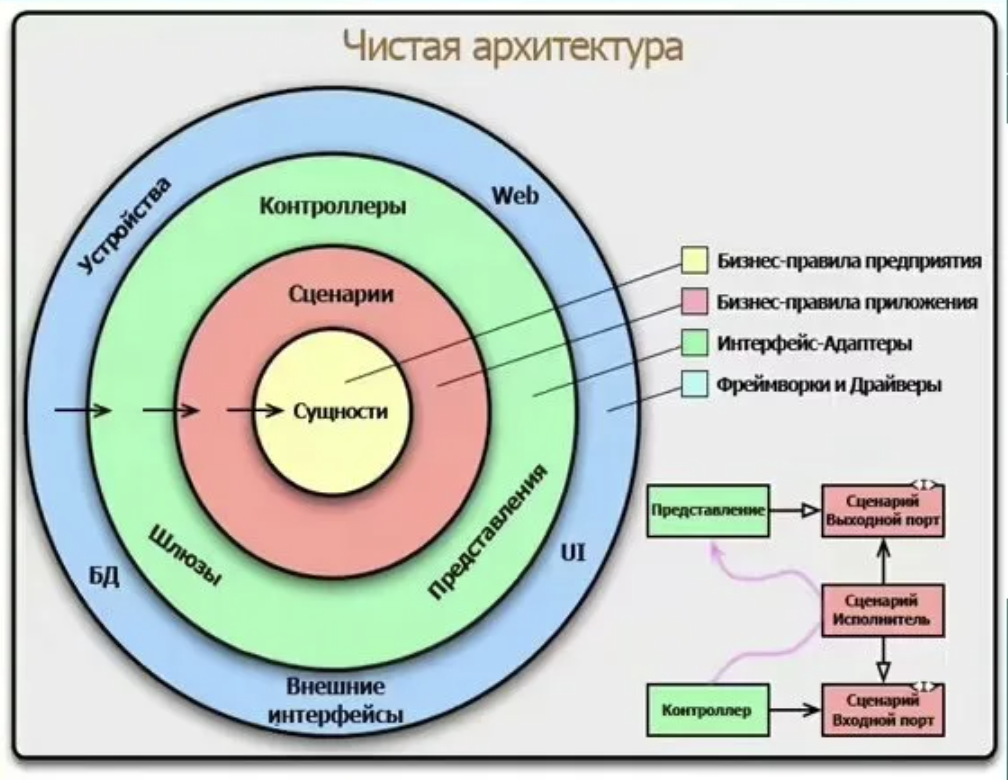

Некоторые слои могут пропускаться если они не нужны. Начнем с первого. Создадим сущности заказа.

In [40]:
class Order:
    def __init__(self, user, items):
        self.user = user
        self.items = items
        self.total = sum(item["price"] for item in items)

Раз мы ввели сущность, то очевидно, что нам нужно ею управлять. А это значит:
* мы должны уметь сохранять в БД
* доставать из БД
* удалять из БД

Мы можем описать как работает определенный сервис но не говорить конкретную реализацию. Для этого создадим абстрактный класс. В Python есть для этого модуль `abc`, для того чтобы описывать такие контракты.

In [42]:
from abc import ABC, abstractmethod

class IOrderRepo(ABC):
    @abstractmethod
    def save(self, order):
        pass

Что примечательно почему тут слово контракт. Если мы отнаследуемся от этого класса-контракта и захотим "недореализовать" все методы, то наш класс наследник все еще останется абстрактным и оно выкинет исключение.

Давайте посмотрим.

In [43]:
class InMemoryOrderRepo(IOrderRepo):
    def __init__(self):
        self.orders = []
        
mem = InMemoryOrderRepo()

TypeError: Can't instantiate abstract class InMemoryOrderRepo without an implementation for abstract method 'save'

И при этом мы можем отнаследоваться от него, и написать конкретную реализацию репозитория. С вами мы напишем, тот что мы уже знаем, на основе cловаря. Настоящие БД будем трогать на паре по БД :-)

In [44]:
class InMemoryOrderRepo(IOrderRepo):
    def __init__(self):
        self.orders = []

    def save(self, order):
        self.orders.append(order)

Теперь напишем инфраструктурный слой. Конкретную работу уведомлений. Опять же введем контракт.

fun-fact: интерпретатор разрешает ставить троеточие на реализацию в абстрактных классах

In [45]:
class INotifier(ABC):
    @abstractmethod
    def send(self, user, message): ...

как мы видим, что мы с вами задавались вопросом, хотим либо просто принтить в консоль, либо отправлять по email. С таким подходом как мы описываем, что мы будем делать:
* сейчас мы напишем конкретную реализацию того, как мы будем печатать в консоль
* для того чтобы написать отправку по email, мы должны отнаследоваться от `INotifier` и в этом классе сделать все необходимые упражнения для работы с SMTP (протокол для отправки email-сообщений)
* классы могут расширяться по мере необходимости

In [46]:
class ConsoleNotifier(INotifier):
    def send(self, user, message):
        print(f"[{user}] {message}")

class EmailNotifier(INotifier):
    def send(self, user, message):
        print(f"Email {user}: {message}")

Теперь, чтобы работать с заказами пишем сервис для работы с заказами. Сервис для работы с заками = это просто класс который умеет работать с заказами, делегируя вызовы в другие сервисы которые так или иначе связаны с заказами. Сам при этом ничего не делает.

In [47]:
class OrderService:
    def __init__(self, repo, notifier):
        self.repo = repo
        self.notifier = notifier

    def create_order(self, user, items):
        order = Order(user, items)
        self.repo.save(order)
        self.notifier.send(user, f"Заказ создан на сумму {order.total} USD")
        return order

Итого наш вызов будет следующим:

In [48]:
repo = InMemoryOrderRepo()
notifier = ConsoleNotifier()
service = OrderService(repo, notifier)

order = service.create_order("Аня", [{"price": 100}, {"price": 250}])

[Аня] Заказ создан на сумму 350 USD


Меняем детали, бизнес-логика та же самая

In [49]:
service = OrderService(InMemoryOrderRepo(), EmailNotifier())
order = service.create_order("Иван", [{"price": 500}])

Email Иван: Заказ создан на сумму 500 USD


## DataClass

Иногда нам нужны классы, которые по существу представляют из себя словари (например, какие-то константные значения etc)

Для этого отлично подойдет [DataClass](https://docs.python.org/3/library/dataclasses.html) - тип классов, который из себя представляет словарик, в виде которого мы и можем хранить предметы

In [53]:
from dataclasses import dataclass, field

@dataclass
class Item:
    """Class for keeping track of an item in inventory."""
    name: str
    unit_price: float
    quantity_on_hand: list

    def total_cost(self):
        return self.unit_price * self.quantity_on_hand

In [54]:
k = Item(15, 13.0, [1,2,3])
print(k)

Item(name=15, unit_price=13.0, quantity_on_hand=[1, 2, 3])


Смотрите, как отличается от обычного класс. На самом деле это просто ЕЩЕ одна обертка над классом, которая самостоятельно строит init, repr, str etc

In [55]:
a = Item("cool", 15.0)
print(a)

TypeError: Item.__init__() missing 1 required positional argument: 'quantity_on_hand'

Но если он сам делает init, как делать наследование? Ну, есть post_init!

In [ ]:
@dataclass
class Rectangle:
    height: float
    width: float

@dataclass
class Square(Rectangle):
    side: float

    def __post_init__(self): # по сути добавление к __init__
        super().__init__(self.side, self.side)

Окей, с простыми типами все понятно. А если мы хотим добавить список?

In [ ]:
@dataclass
class Item:
    """
    Parameters:
        name: string, descr
        unit_price: float, sdfkeoifkeopf
    Class for keeping track of an item in inventory.

    """
    name: str
    unit_price: float
    depend: list[Rectangle]

a = Rectangle(15, 20)
b = Item("b", 17, [a])
print(b)

Item(name='b', unit_price=17, depend=[Rectangle(height=15, width=20)])


Опа, что за фигня, что за обозначения?

А это все Typing! Которым по-хорошему надо пользоваться **всегда**

## Typing

Ссылка на документацию: [Тык](https://docs.python.org/3/library/typing.html)

Главный плюс Pythonа - это динамическая типизация (мы не говорим, какой тип должен быть в переменной, он сам это понимает)

Один из больших минусов Python - динамическая типизация (читаешь код, не понимаешь, что ожидаем, делаем ошибки)

Как помочь с этим? Правильно, указывать тип! (Особенно полезно в класса и функциях)

**WARNING:** сам по себе от этого Python не меняется, это сахар. Многие IDE уже умеют ловить по Typing какие-то проблемы, но это дополнительные наработки, с точки зрения Python вообще пофиг



In [ ]:
import typing

a = 5
a: int = 5 ## Обозначили, что тут лежит int
print(a)

5


In [40]:
a: str = 5 ## Обозначили, что тут лежит str (и положили число, гении)
print(a) ## Все равно отработает

5


Базовая конструкция:



```
<variable>: <type> [= value] (последнее опционально) - для обозоначения переменных

def f() -> <type>  - для обозначения функции
```



In [42]:
def f(number: int, value: int) -> float:
    return number / value

def g(number: int, value: int) -> None: ## тут ничего не ожидаем
    print(number / value)

print(f(5, 12))
g(5, 1)

0.4166666666666667
5.0


Чуть-чуть сложнее (с классами):

In [ ]:
from typing import Self

class Book:
    title: str ##обозначили, что элемент будет строкой (компилятор этот момент пропустит, пока не инициализировали, толка нет)
    author: str

    def __init__(self: Self, title: str, author: str) -> None: ## для self мы не указываем никогда тип
        self.title = title
        self.author = author

b: Book = Book(title='Fahrenheit 451', author='Bradbury') ## Тип - класс
print(b.title)

Fahrenheit 451


### Optional, Any, Union

Не всегда есть вариант, что в переменной лежит что-то (например, там может лежать None)

Что же делать? Просто int его не обозначить... Для этого есть Optional!

* Optional - либо None, либо наш тип

In [ ]:
a: int | None
a: Optional[int]

a = None
print(a)

None


А иногда нам плевать, какой тип находится в переменной, что же тогда сказать? Правильно, Any!

* Any - вообще что угодно

In [49]:
from typing import Any

a: Any
a = "abc"
print(a)
a = None
print(a)

abc
None


Третий вариант - нам не пофиг, но типов несколько (скажем, может быть как int, так и float)

Тогда используем Union!

In [ ]:
a: int | str | bytes
a = 1
print(a)

1


### Списки, Множества, Словари, Кортежи

In [ ]:
a: list[int] = [1,2,3] #сколько угодно, тут все просто
print(a)
b: tuple[int] = (1,) #1 элемент всего, если несколько, то надо перечислять
c: tuple[int, str] = (1, "hi")
d: tuple[int, ...] = (1, 2, 3) ##неизвестное число одонтипных элементов
print(b, c, d)
e: dict[str, str] = {"a": "b"} #отдельно ключи, отдельно значения
print(e)

[1, 2, 3]
(1,) (1, 'hi') (1, 2, 3)
{'a': 'b'}


### Итераторы, генераторы, функции

Тут опять-таки база: Iterable или же Generator

In [ ]:
from collections.abc import Iterable, Generator

def generate_two() -> Iterable[int]:
    yield 1
    yield 2

С функциями чуть-чуть сложнее: Callable[[ArgTypes], ReturnType] - указываем типы аргументов и далее какой тип возвращает (единственное, что если у нас сколько угодно аргументов, то указывается только троеточие)

In [ ]:
from collections.abc import Callable

def f() -> None:
    print("This is string")

def render_hundreds(num: int) -> str:
    return str(num // 100)

def app(f: Callable[[], None], renderer: Callable[[int], str]): #  без именованных, к сожалению
    f()
    num = 12345
    print(renderer(num))

app(f, render_hundreds)

This is string
123


In [63]:
print(app.__annotations__) # Если говорить о том, где мы вообще что-то можем увидеть, то вуаля, в аннотации к функции

{'f': typing.Callable[[], NoneType], 'renderer': typing.Callable[[int], str]}


Последнее, про что расскажем - про дженерик типы. В некоторых случаях мы генерируем что-то, что имеет один тип, но этот тип может меняться (подумайте о всяких факториях). В данном случае нужно иметь нечто, что говорит: вот это все какой-то тип, он он один. Этот уровень абстракции можно достичь с помощью TypeVar:

In [64]:
from typing import TypeVar, Generic


T = TypeVar("T", float, int) # Можем задать ограничения

class LinkedList(Generic[T]): # Создаем дженерик
    data: T
    next: "LinkedList[T]"

    def __init__(self, data: T):
        self.data = data

head_int: LinkedList[int] = LinkedList(1)
head_int.next = LinkedList(2)

## Pydantic

Чуть-чуть поговорили про Typing, но как я уже говорил, для Python в чистом виде это все ничего, его это не особо волнует. Вот бы была библиотека, которая позволяет вас наказывать за неправильные типы...
Вот для этого и нужен [Pydantic](https://docs.pydantic.dev/latest/)

In [65]:
!pip install pydantic

In [ ]:
from pydantic import BaseModel

class Fridge(BaseModel):
    items: list[str]

def toUpper(x: str):
    return x.capitalize()

def get_stuff(item:str, fridge:Fridge):
    fridge.items.append(item)
    return list(map(toUpper, fridge.items))

print(get_stuff(item="orange", fridge=Fridge(items={"apple", 1,  "pear"})))

ValidationError: 1 validation error for Fridge
items.0
  Input should be a valid string [type=string_type, input_value=1, input_type=int]
    For further information visit https://errors.pydantic.dev/2.9/v/string_type

In [67]:
print(get_stuff(item="orange", fridge=Fridge(items={"apple", "pear"})))

['Apple', 'Pear', 'Orange']


Что позволяет Pydantic? Внутри классов он позволяет отдельно учитыать все те typing, которые были использованы, и если мы передаем какие-то значения не по правилам, то получаем ошибку. Просто и незатейливо

И самый прикол, что за счет внутренней реализации Pydantic - это самый быстрый способ это сделать